## Paquetes necesarios

In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

## Cargar el paquete Yahoo Finance

In [6]:
!pip install yfinance

  Using cached peewee-3.17.7-py3-none-any.whl
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 3.8/3.8 MB 32.3 MB/s eta 0:00:00


In [7]:
def preprocessing_yf(symbol):
  
  #Importar los datos
  df = yf.download(symbol).dropna()

  #Renombrar
  df.columns = ["open", "high", "low", "close", "adj close", "volume"]
  df.index.name = "time"

  # Eliminar la columna adj close
  del df["adj close"]

  return df

In [8]:
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

### Descarga la serie de tiempo de la accción de Amazon

In [9]:
df = preprocessing_yf("AMZN")

[*********************100%***********************]  1 of 1 completed


In [10]:
df=df.asfreq('b') #bussiness day
df=df.fillna(method='ffill')

In [11]:
df.head()

,open,high,low,close,volume
time,,,,,
1997-05-15 00:00:00+00:00,0.097917,0.097917,0.125000,0.096354,1.443120e+09
1997-05-16 00:00:00+00:00,0.086458,0.086458,0.098958,0.085417,2.940000e+08
1997-05-19 00:00:00+00:00,0.085417,0.085417,0.088542,0.081250,1.221360e+08
1997-05-20 00:00:00+00:00,0.081771,0.081771,0.087500,0.081771,1.093440e+08
1997-05-21 00:00:00+00:00,0.071354,0.071354,0.082292,0.068750,3.770640e+08


In [12]:
df.tail()

,open,high,low,close,volume
time,,,,,
2024-10-15 00:00:00+00:00,187.690002,187.690002,188.410004,184.580002,32178900.0
2024-10-16 00:00:00+00:00,186.889999,186.889999,187.779999,185.610001,23456800.0
2024-10-17 00:00:00+00:00,187.529999,187.529999,188.940002,186.000000,25039400.0
2024-10-18 00:00:00+00:00,188.990005,188.990005,190.740005,186.279999,37417700.0
2024-10-21 00:00:00+00:00,189.070007,189.070007,189.460007,186.399994,24612200.0


In [13]:
df.describe()

,open,high,low,close,volume
count,7158.000000,7158.000000,7158.000000,7158.000000,7.158000e+03
mean,38.528991,38.528991,38.986682,38.047513,1.361823e+08
std,55.050869,55.050869,55.689865,54.393507,1.367933e+08
min,0.069792,0.069792,0.072396,0.065625,9.744000e+06
25%,2.087750,2.087750,2.131125,2.050000,6.366650e+07
50%,8.840500,8.840500,8.927000,8.716750,1.007730e+08
75%,58.466624,58.466624,58.925376,58.069126,1.555940e+08
max,200.000000,200.000000,201.199997,199.050003,2.086584e+09


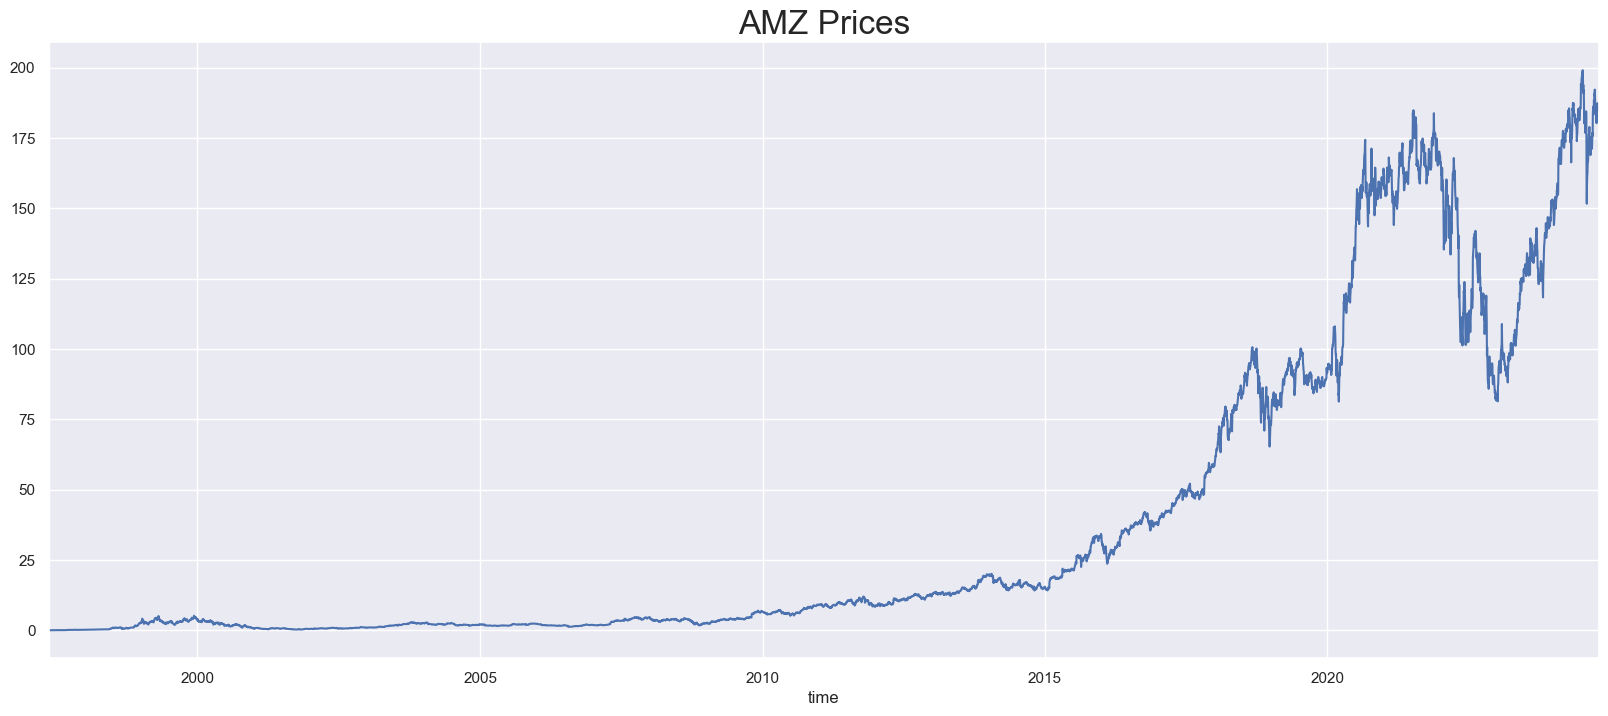

In [14]:
df.close.plot(figsize=(20,8))
plt.title("AMZ Prices", size = 24)
#plt.ylim(0,2300)
plt.show()

<Axes: xlabel='time'>

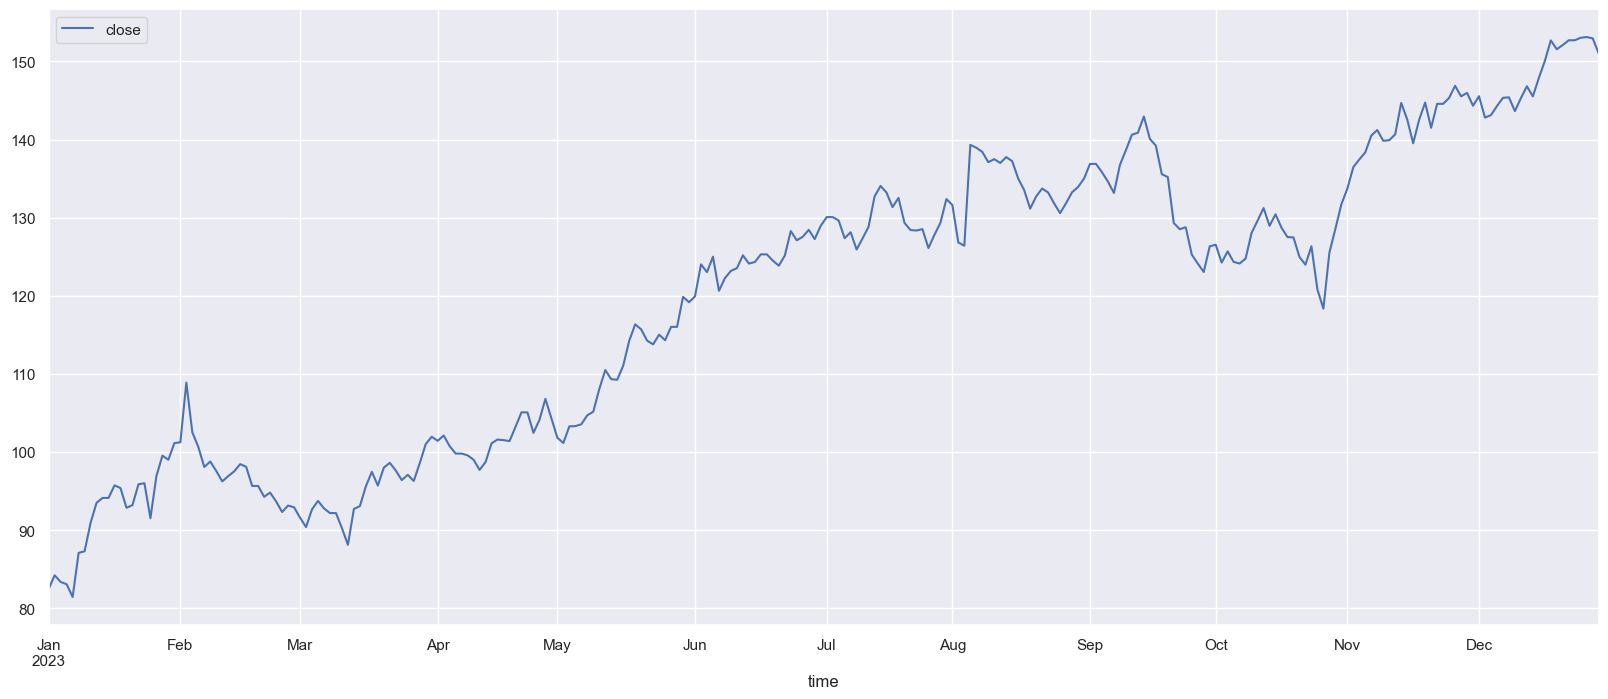

In [15]:
df[["close"]].loc["2023"].plot(figsize=(20,8))

## Prueba de estacionalidad de la serie de tiempo

https://www.analyticsvidhya.com/blog/2021/06/statistical-tests-to-check-stationarity-in-time-series-part-1/

Se calcula un estadístico de prueba ($\lambda_0$), que también se llama estadístico de constraste.

Este estadístico de prueba se compara con un valor crítico de la prueva ($\lambda_{critico}$).

Si $(\lambda_0 < \lambda_{critico})$ se rechaza $H_0$. Por tanto, la serie es estacionaria.

Otra forma es calculando el $p_{valor}$ con el cual se obtiene evidencia a favor de la hipótesis nula.

Si el $p_{valor}$ es cercano a cero, la probabilidad de aceptar la hipótesis nula es pequeña.

$\alpha =$ nivel de significancia.

$1 - \alpha =$ nivel de confianza.

$H_0: $ La series no es estacionaria.

Si $p_{valor} < \alpha $ se rechaza $H_0$. Por tanto, la serie es estacionaria.

In [16]:
vL = sts.adfuller(df.close)
vL

(1.0850075090786198,
 0.9950866146469888,
 35,
 7122,
 {'1%': -3.431268514249962,
  '5%': -2.861945910598893,
  '10%': -2.5669860621190232},
 23556.63835103074)

In [ ]:
print(f'El estadístico de prueba es : {vL[0]}') # Estadístico de prueba

In [ ]:
print(f'El pvalor es : {vL[1]}')

In [ ]:
print(f'El período de tiempo en que se detecta autocorrelación es : {vL[2]}')

In [ ]:
print(f'La cantidad de datos en la serie de tiempos es : {vL[3]}')

In [ ]:
print(f'Los valores críticos para cada nivel de significancia son : {vL[4]}')

In [ ]:
print(f'El criterio de información maximizado es : {vL[5]}')

Para un nivel de confianza del 95%, la serie no es estacionaria

$1.1637150167781993  = \lambda_0 > -2.86194562577061 = \lambda_{critico}$

La $H_0: $ no debe ser rechazada.

La serie NO es estacionaria

In [ ]:
sts.adfuller(df[["close"]].loc["2023"])

## Descomposición de la serie en componentes

In [ ]:
s_dec_additive = seasonal_decompose(df[["close"]].loc["2023"], model = "additive")
fig = s_dec_additive.plot();
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

## Caminata aleatoria

In [ ]:
steps = np.random.normal(loc=0, scale=1, size=len(df[["close"]].loc["2023"]))

In [ ]:
steps.shape

In [ ]:
P = 100 + np.cumsum(steps)

In [ ]:
P = pd.DataFrame(P)

In [ ]:
P.index =df[["close"]].loc["2023"].index

In [ ]:
P.columns = ["Caminata Aleatoria"]

In [ ]:
P

In [ ]:
P.plot(figsize=(20,8))

In [ ]:
P["Serie"] = df[["close"]].loc["2023"]

In [ ]:
P["Ruido Blanco"] = steps

In [ ]:
P.head()

In [ ]:
P["Caminata Aleatoria"].plot(figsize = (20,8))
P["Serie"].plot()
plt.title("Random Walk vs AMZN", size = 24)
plt.legend() 
plt.show()

## Función de autocorrelación ACF

https://otexts.com/fpp2/autocorrelation.html

In [ ]:
sgt.plot_acf(P["Serie"], lags = 40, zero = False)
plt.title("ACF AMZN 2023", size = 24)
plt.show()

In [ ]:
sgt.plot_acf(P["Caminata Aleatoria"], lags = 40, zero = False)
plt.title("ACF Caminata Aleatoria", size = 24)
plt.show()

In [ ]:
sgt.plot_acf(P["Ruido Blanco"], lags = 40, zero = False)
plt.title("ACF Ruido Blanco", size = 24)
plt.show()

## Función de autocorrelación parcial PACF

In [ ]:
sgt.plot_pacf(P["Serie"], lags = 40, zero = False, method = ('ols'))
plt.title("PACF AMZN 2023", size = 24)
plt.show()

In [ ]:
sgt.plot_pacf(P["Caminata Aleatoria"], lags = 40, zero = False, method = ('ols'))
plt.title("PACF Caminata Aleatoria", size = 24)
plt.show()

In [ ]:
sgt.plot_pacf(P["Ruido Blanco"], lags = 40, zero = False, method = ('ols'))
plt.title("PACF Ruido Blanco", size = 24)
plt.show()